# DATA COLLECTION

In [1]:
!pip install --upgrade pip

In [2]:
#!pip3 install twint
!pip install -U textblob
!pip install emoji --upgrade
!pip install --upgrade pip
!pip install wordcloud
!pip install nest_asyncio
!pip install twint module from its repo
!pip install -U gensim
!pip install pyLDAvis


In [3]:
conda install git


Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [4]:
!pip3 install --user --upgrade git+https://github.com/twintproject/twint.git@origin/master#egg=twint

  Cloning https://github.com/twintproject/twint.git (to revision origin/master) to c:\users\andyo\appdata\local\temp\pip-install-cr9kzpxk\twint_32657133c3c643d4b4596663e9bf91ce


In [5]:
conda install -c conda-forge/label/gcc7 missingno 

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [6]:
!pip install plotly

#scientific and machine learning libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix,f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
#plotting options
import seaborn as sns
import re
import matplotlib.pyplot as plt
import missingno as ms
#% matplotlib inline
pd.set_option('display.max_colwidth',None)
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
#twint
import twint
#to avoid problems with running twint
import nest_asyncio
nest_asyncio.apply()


In [7]:
!pip install spacy

import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import spacy

# importing package to recognize stop words i.e. the, and, an etc
from spacy.lang.en.stop_words import STOP_WORDS
stop_words = spacy.lang.en.stop_words.STOP_WORDS

import datetime

import plotly.express as px

#nltk.download('punkt')
stop_words = spacy.lang.en.stop_words.STOP_WORDS

stemmer = PorterStemmer()

In [8]:
## Sources: 

keywords = ["Museum Innovation"]

search_concatenation = keywords


In [9]:
search_concatenation

['Museum Innovation']

In [10]:
len(search_concatenation)

1

In [11]:
# the concept is to perform the scraping using the elements in the lists above: imm_basic, immigrant_mod, migrant_mod and refugee_mod
df = []
for s in search_concatenation:
    config = twint.Config()
    config.Search = s
    config.Lang = "en"
    config.Limit = 100000
    config.Since = "2020-04-01 00:00:00"
    config.Until = "2020-11-30 00:00:00"
    config.Hide_output = True
    config.Pandas = True
    twint.run.Search(config)
    Tweets_df = twint.storage.panda.Tweets_df
    df.append(Tweets_df)  
    
# see pd.concat documentation for more info
df = pd.concat(df).sort_values(by=['date']).reset_index()


print(len(df))

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
2431


In [ ]:
df.shape

In [ ]:
# with this command I'm checking 

df.groupby('search').sum().shape, len(search_concatenation)

In [ ]:
##Save Uncleaned Data 
##(SAVE YOUR FIRST SEARCHED TWEETS HERE) 
## AFTER SAVING GO BACK TO SEARCH WITH A NEW KEYWORDS IN CELL 8.SAVE THE NEXT SEARCHED TWEETS IN THE NEXT CELL

df.to_csv('Museum_Technology.csv')

In [12]:
##Save Uncleaned Data 
##(SAVE YOUR SECOND SEARCHED TWEETS HERE)
##AFTER SAVING GO BACK TO SEARCH WITH A NEW KEYWORDS IN CELL 8.SAVE THE NEXT SEARCHED TWEETS IN THE NEXT CELL

df.to_csv('Museum_Innovation.csv')

In [ ]:
##Save Uncleaned Data 
##(SAVE YOUR THIRD SEARCHED TWEETS HERE) 
##AFTER SAVING GO BACK TO SEARCH WITH A NEW KEYWORDS IN CELL 8. SAVE THE NEXT SEARCHED TWEETS IN THE NEXT CELL

df.to_csv('Museum_COVID-19.csv')

In [13]:
df1=pd.read_csv('Museum_Technology.csv')
df2=pd.read_csv('Museum_Innovation.csv')
df3=pd.read_csv('Museum_COVID-19.csv')

In [14]:
## merge all dataframes
df_list = [df1,df2,df3]
df = pd.concat(df_list)

In [15]:
##SAVE MERGED DATA HERE

df.to_csv("MergedUncleanedData.csv")

In [16]:
##READ OR IMPORT MERGED DATA HERE

df=pd.read_csv("MergedUncleanedData.csv")

# DATA CLEANING

In [17]:
df.head()

,Unnamed: 0,Unnamed: 0.1,index,id,conversation_id,created_at,date,timezone,place,tweet,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,0,0,6890,1245142325455699969,1245142325455699969,1.585700e+12,2020-03-31 20:13:58,-500,NaN,"Find your #Doppelgangster by downloading The Mob Museum free mobile app. Using cutting-edge facial recognition technology, the app compares your facial features with a database of notable heroes, villains, &amp; associates of the Mob world to find your match. https://t.co/0ymaA2Esrq https://t.co/SzOR1AXc8s",...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1,1,6889,1245145894875467776,1245127249063534592,1.585701e+12,2020-03-31 20:28:09,-500,NaN,"@VaverkaCady I think other museums and historical organizations can definitely incorporate new technologies and update their interpretations to be more relevant to the 21st century. I love the idea of the switch to the ""other"" telling THEIR story and being apart of the planning process. (1)",...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'VaverkaCady', 'name': 'Cady Vaverka', 'id': '1215278990103076864'}]",NaN,NaN,NaN,NaN
2,2,2,6888,1245174282759651328,1245142100519378950,1.585708e+12,2020-03-31 22:20:57,-500,NaN,"@adriannerussell 30% of NY’s Museums closed 2018 in deficit; too many factors here...lack of community engagement, poor planning, limited funding for gen op, shortsighted investment in staff and technology, imbalance of program to capital projects...cant point to one thing",...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'adriannerussell', 'name': 'Adrianne Russell', 'id': '14372097'}]",NaN,NaN,NaN,NaN
3,3,3,6887,1245176611596451846,1245176611596451846,1.585708e+12,2020-03-31 22:30:13,-500,NaN,"@ChileCompra GLAD TO SEE YOU ,AND WE ARE THE SUPPLIER OF CHINA SCIENCE AND TECHNOLOGY MUSEUM ,Hefei Panshi Automation Technology Co.,Ltd ,thanks a lot.",...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,4,4,6886,1245184109011439618,1245184109011439618,1.585710e+12,2020-03-31 23:00:00,-500,NaN,"As theaters, museums and concert halls temporarily close their doors to the public, artists and galleries are using technology to reach new audiences https://t.co/r9ajUgQwPd",...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27811 entries, 0 to 27810
Data columns (total 41 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       27811 non-null  int64  
 1   Unnamed: 0.1     27811 non-null  int64  
 2   index            27811 non-null  int64  
 3   id               27811 non-null  int64  
 4   conversation_id  27811 non-null  int64  
 5   created_at       27811 non-null  float64
 6   date             27811 non-null  object 
 7   timezone         27811 non-null  int64  
 8   place            350 non-null    object 
 9   tweet            27811 non-null  object 
 10  language         27811 non-null  object 
 11  hashtags         27811 non-null  object 
 12  cashtags         27811 non-null  object 
 13  user_id          27811 non-null  int64  
 14  user_id_str      27811 non-null  int64  
 15  username         27811 non-null  object 
 16  name             27811 non-null  object 
 17  day         

In [19]:
df['INCDTTM'] =  pd.to_datetime(df['date'], infer_datetime_format=True)
df['Time'] = [datetime.datetime.time(d) for d in df['INCDTTM']] 
df['Date'] = [datetime.datetime.date(d) for d in df['INCDTTM']]
df['Year'] = [datetime.datetime.date(d).year for d in df['INCDTTM']] 
df['Month'] = [datetime.datetime.date(d).month for d in df['INCDTTM']] 
df = df.drop(columns = ['date','INCDTTM'])
df.head()

,Unnamed: 0,Unnamed: 0.1,index,id,conversation_id,created_at,timezone,place,tweet,language,...,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,Time,Date,Year,Month
0,0,0,6890,1245142325455699969,1245142325455699969,1.585700e+12,-500,NaN,"Find your #Doppelgangster by downloading The Mob Museum free mobile app. Using cutting-edge facial recognition technology, the app compares your facial features with a database of notable heroes, villains, &amp; associates of the Mob world to find your match. https://t.co/0ymaA2Esrq https://t.co/SzOR1AXc8s",en,...,NaN,[],NaN,NaN,NaN,NaN,20:13:58,2020-03-31,2020,3
1,1,1,6889,1245145894875467776,1245127249063534592,1.585701e+12,-500,NaN,"@VaverkaCady I think other museums and historical organizations can definitely incorporate new technologies and update their interpretations to be more relevant to the 21st century. I love the idea of the switch to the ""other"" telling THEIR story and being apart of the planning process. (1)",en,...,NaN,"[{'screen_name': 'VaverkaCady', 'name': 'Cady Vaverka', 'id': '1215278990103076864'}]",NaN,NaN,NaN,NaN,20:28:09,2020-03-31,2020,3
2,2,2,6888,1245174282759651328,1245142100519378950,1.585708e+12,-500,NaN,"@adriannerussell 30% of NY’s Museums closed 2018 in deficit; too many factors here...lack of community engagement, poor planning, limited funding for gen op, shortsighted investment in staff and technology, imbalance of program to capital projects...cant point to one thing",en,...,NaN,"[{'screen_name': 'adriannerussell', 'name': 'Adrianne Russell', 'id': '14372097'}]",NaN,NaN,NaN,NaN,22:20:57,2020-03-31,2020,3
3,3,3,6887,1245176611596451846,1245176611596451846,1.585708e+12,-500,NaN,"@ChileCompra GLAD TO SEE YOU ,AND WE ARE THE SUPPLIER OF CHINA SCIENCE AND TECHNOLOGY MUSEUM ,Hefei Panshi Automation Technology Co.,Ltd ,thanks a lot.",en,...,NaN,[],NaN,NaN,NaN,NaN,22:30:13,2020-03-31,2020,3
4,4,4,6886,1245184109011439618,1245184109011439618,1.585710e+12,-500,NaN,"As theaters, museums and concert halls temporarily close their doors to the public, artists and galleries are using technology to reach new audiences https://t.co/r9ajUgQwPd",en,...,NaN,[],NaN,NaN,NaN,NaN,23:00:00,2020-03-31,2020,3


In [20]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'index', 'id', 'conversation_id',
       'created_at', 'timezone', 'place', 'tweet', 'language', 'hashtags',
       'cashtags', 'user_id', 'user_id_str', 'username', 'name', 'day', 'hour',
       'link', 'urls', 'photos', 'video', 'thumbnail', 'retweet', 'nlikes',
       'nreplies', 'nretweets', 'quote_url', 'search', 'near', 'geo', 'source',
       'user_rt_id', 'user_rt', 'retweet_id', 'reply_to', 'retweet_date',
       'translate', 'trans_src', 'trans_dest', 'Time', 'Date', 'Year',
       'Month'],
      dtype='object')

In [21]:
df=df.drop(['index', 'id', 'conversation_id', 'created_at', 'timezone', 'language', 'hashtags', 'cashtags', 'user_id', 'user_id_str',
       'username', 'name', 'day', 'hour', 'link', 'urls', 'photos', 'video',
       'thumbnail', 'retweet', 'nlikes', 'nreplies', 'nretweets', 'quote_url',
       'search', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest', 'Time',], axis=1)

In [22]:
df.head()

,Unnamed: 0,Unnamed: 0.1,place,tweet,near,geo,Date,Year,Month
0,0,0,NaN,"Find your #Doppelgangster by downloading The Mob Museum free mobile app. Using cutting-edge facial recognition technology, the app compares your facial features with a database of notable heroes, villains, &amp; associates of the Mob world to find your match. https://t.co/0ymaA2Esrq https://t.co/SzOR1AXc8s",NaN,NaN,2020-03-31,2020,3
1,1,1,NaN,"@VaverkaCady I think other museums and historical organizations can definitely incorporate new technologies and update their interpretations to be more relevant to the 21st century. I love the idea of the switch to the ""other"" telling THEIR story and being apart of the planning process. (1)",NaN,NaN,2020-03-31,2020,3
2,2,2,NaN,"@adriannerussell 30% of NY’s Museums closed 2018 in deficit; too many factors here...lack of community engagement, poor planning, limited funding for gen op, shortsighted investment in staff and technology, imbalance of program to capital projects...cant point to one thing",NaN,NaN,2020-03-31,2020,3
3,3,3,NaN,"@ChileCompra GLAD TO SEE YOU ,AND WE ARE THE SUPPLIER OF CHINA SCIENCE AND TECHNOLOGY MUSEUM ,Hefei Panshi Automation Technology Co.,Ltd ,thanks a lot.",NaN,NaN,2020-03-31,2020,3
4,4,4,NaN,"As theaters, museums and concert halls temporarily close their doors to the public, artists and galleries are using technology to reach new audiences https://t.co/r9ajUgQwPd",NaN,NaN,2020-03-31,2020,3


In [23]:
df['tweet'].nunique()

26606

In [24]:
# load library
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# download the set of stop words the first time
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\andyo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
# Load stop words
stop_words = stopwords.words('english')

# Show stop words
stop_words[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [26]:
#### Now creating some functions to do text processing
# Removing hashtags and mentions
def get_hashtags(text):
    hashtags = re.findall(r'\#\w+',text.lower())
    return hashtags
def get_mentions(text):
    mentions = re.findall(r'\@\w+',text.lower())
    return mentions

# Cleaning up the text of the tweets
def remove_content(text):
    text = re.sub(r"http\S+", "", text) #remove urls
    text=re.sub(r'\S+\.com\S+','',text) #remove urls
    text=re.sub(r'\@\w+','',text) #remove mentions
    text =re.sub(r'\#\w+','',text) #remove hashtags
    return text

def process_tweet(tweet):
    """ 
    tweets cleaning by 
    1) lowering the case of the tweet, 
    2) removing unwanted symbols and replacing them with a whitespace, 
    3) split sentences into words according to whitespaces and then 
    4) join back with a single whitespace as separator between various words
    """
    return " ".join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])", " ",tweet.lower()).split())

def process_text(text, stem=False): #clean text
    text=remove_content(text)
    lemmatizer=WordNetLemmatizer()
    text = re.sub('[^A-Za-z]', ' ', text.lower()) #remove non-alphabets
    text = re.sub(r'@[A-Za-z0-9]+', '', str(text)) # remove @mentions
    text = re.sub(r'#', '',  str(text)) # remove the '#' symbol
    text = re.sub(r'RT[\s]+', '',  str(text)) # remove RT
    text = re.sub(r'https?\/\/S+', '',  str(text)) # remove the hyperlink
    text = re.sub(r'http\S+', '',  str(text)) # remove the hyperlink
    text = re.sub(r'www\S+', '',  str(text)) # remove the www
    text = re.sub(r'twitter+', '',  str(text)) # remove the twiiter
    text = re.sub(r'pic+', '',  str(text)) # remove the pic
    text = re.sub(r'com', '',  str(text)) # remove the pic
    text = re.sub(r"\bamp\b", ' ', text.lower()) #remove "amp" which is coming from the translation of &
    text = re.sub(r"\bco\b", ' ', text.lower()) #remove "co" which was one of the top words found below
    tokenized_text = word_tokenize(text) #tokenize
    #tokenized_text = [lemmatizer.lemmatize(word) for word in tokenized_text]
    clean_text = [
         word for word in tokenized_text
         if (word not in stop_words and len(word)>1)
    ]
    if stem:
        clean_text=[stemmer.stem(word) for word in clean_text]
    clean_text = [lemmatizer.lemmatize(word) for word in clean_text]
    return ' '.join(clean_text)

#functions used to remove search terms from all the tweets
#function to remove duplicates from a string - in this case the string is the keywords used to scrape the tweets
def removeDupWithoutOrder(string): 
    words = string.lower().split()
    return " ".join(sorted(set(words), key=words.index)).replace('OR', '').replace('  ', ' ')

#function to search for string (i.e. tweet in this case) and remove specific words (search_terms in this case)
def remove_search(text, search_terms):
    query = text.lower()
    querywords = query.split()
    resultwords  = [word for word in querywords if word.lower() not in search_terms]
    return ' '.join(resultwords)

# define function to plot frequency of bi-grams, tri-grams, single words, phrases etc
from sklearn.feature_extraction.text import CountVectorizer
def plot_topn(sentences, ngram_range=(1,3), top=20,firstword=''):
    c=CountVectorizer(ngram_range=ngram_range)
    X=c.fit_transform(sentences)
    words=pd.DataFrame(X.sum(axis=0),columns=c.get_feature_names()).T.sort_values(0,ascending=False).reset_index()
    res=words[words['index'].apply(lambda x: firstword in x)].head(top)
    pl=px.bar(res, x='index',y=0)
    pl.update_layout(yaxis_title='count',xaxis_title='Phrases')
    pl.show('png')

In [27]:
# removing useless content (hashtags, mentions)
df['tweet']=df['tweet'].apply(lambda x: remove_content(x))

In [28]:
# Several functions applied here: processing the *tweet* to remove punctuation, hashtags, mentions
# then removing the search terms used to do the tweets scraping and re-process the *text* 

df['cleaned_tweets']=df['tweet'].apply(lambda x: process_tweet(x))

In [29]:
#this next row drops from the scraped tweets the same keywords that were used to perform the search.
#if these words are excluded, the sentiment analysis performed with text blob looks at the whole tweet 
#and can spit out a different sentiment wrt if leaving the search terms in. Perhaps worth test it out a bit
#and look at TextBlob with naivebayes too.

df['cleaned_tweets']=df['cleaned_tweets'].apply(lambda x: remove_search(x, search_concatenation))

#df['cleaned_tweets']=df['cleaned_tweets'].apply(lambda x: process_text(x))

In [30]:
df.head()

,Unnamed: 0,Unnamed: 0.1,place,tweet,near,geo,Date,Year,Month,cleaned_tweets
0,0,0,NaN,"Find your by downloading The Mob Museum free mobile app. Using cutting-edge facial recognition technology, the app compares your facial features with a database of notable heroes, villains, &amp; associates of the Mob world to find your match.",NaN,NaN,2020-03-31,2020,3,find your by downloading the mob museum free mobile app using cutting edge facial recognition technology the app compares your facial features with a database of notable heroes villains amp associates of the mob world to find your match
1,1,1,NaN,"I think other museums and historical organizations can definitely incorporate new technologies and update their interpretations to be more relevant to the 21st century. I love the idea of the switch to the ""other"" telling THEIR story and being apart of the planning process. (1)",NaN,NaN,2020-03-31,2020,3,i think other museums and historical organizations can definitely incorporate new technologies and update their interpretations to be more relevant to the 21st century i love the idea of the switch to the other telling their story and being apart of the planning process 1
2,2,2,NaN,"30% of NY’s Museums closed 2018 in deficit; too many factors here...lack of community engagement, poor planning, limited funding for gen op, shortsighted investment in staff and technology, imbalance of program to capital projects...cant point to one thing",NaN,NaN,2020-03-31,2020,3,30 of ny s museums closed 2018 in deficit too many factors here lack of community engagement poor planning limited funding for gen op shortsighted investment in staff and technology imbalance of program to capital projects cant point to one thing
3,3,3,NaN,"GLAD TO SEE YOU ,AND WE ARE THE SUPPLIER OF CHINA SCIENCE AND TECHNOLOGY MUSEUM ,Hefei Panshi Automation Technology Co.,Ltd ,thanks a lot.",NaN,NaN,2020-03-31,2020,3,glad to see you and we are the supplier of china science and technology museum hefei panshi automation technology co ltd thanks a lot
4,4,4,NaN,"As theaters, museums and concert halls temporarily close their doors to the public, artists and galleries are using technology to reach new audiences",NaN,NaN,2020-03-31,2020,3,as theaters museums and concert halls temporarily close their doors to the public artists and galleries are using technology to reach new audiences


In [31]:
df.tail()

,Unnamed: 0,Unnamed: 0.1,place,tweet,near,geo,Date,Year,Month,cleaned_tweets
27806,18484,18484,NaN,NYC Museum tour today - virtually,NaN,NaN,2020-11-28,2020,11,nyc museum tour today virtually
27807,18485,18485,"{'type': 'Point', 'coordinates': [5.55666667, -0.20777778]}",National Museum of Ghana gallery closed due to COVID-19 but we got a great tour of sculpture garden! @ National Museum of Ghana,NaN,NaN,2020-11-28,2020,11,national museum of ghana gallery closed due to covid 19 but we got a great tour of sculpture garden national museum of ghana
27808,18486,18486,NaN,"The new “COVID-19: Battling the Invisible Enemy” exhibit is now open at the NATM. At no additional cost to general admission, you can learn more about the work being done by the Science and Technology Directorate in supporting the country’s COVID-19 response.",NaN,NaN,2020-11-28,2020,11,the new covid 19 battling the invisible enemy exhibit is now open at the natm at no additional cost to general admission you can learn more about the work being done by the science and technology directorate in supporting the country s covid 19 response
27809,18487,18487,NaN,"67% of U.S. Museums Have Cut Education Programming During COVID-19, New Report Finds",NaN,NaN,2020-11-28,2020,11,67 of u s museums have cut education programming during covid 19 new report finds
27810,18488,18488,NaN,Leak exposes personal data for millions of Brazilian COVID-19 patients,NaN,NaN,2020-11-28,2020,11,leak exposes personal data for millions of brazilian covid 19 patients


In [32]:
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

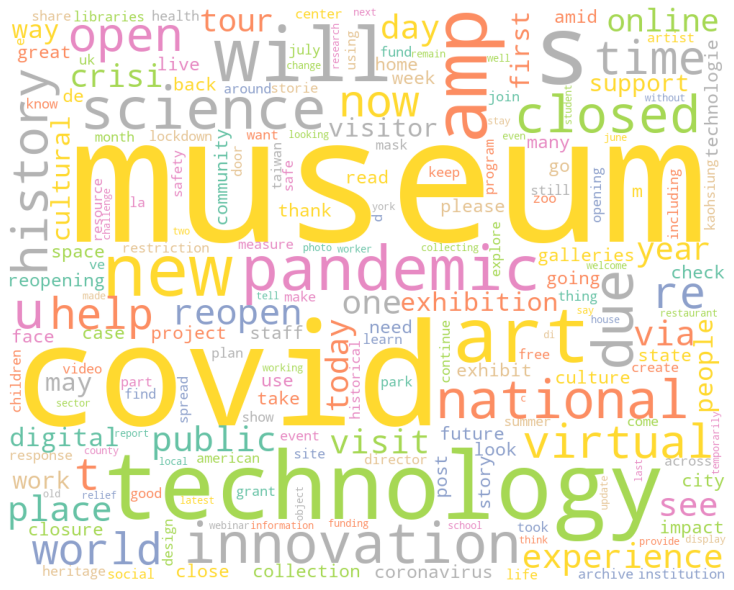

In [33]:
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df.cleaned_tweets: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 1000, height = 800, 
                background_color='white', colormap='Set2', 
                collocations=False, 
                stopwords = stopwords, 
                min_font_size = 12).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [34]:
df.to_csv("Cleaned_Tweet.csv")

# Data Analysis

In [35]:
import pandas as pd
import numpy as np
import string
import re
import nltk
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [36]:
def getSubjectivity(text):
    return TextBlob( str(text)).sentiment.subjectivity

def getPolarity(text):
    return TextBlob( str(text)).sentiment.polarity

In [37]:
df.dropna(subset=['cleaned_tweets'], inplace = True)
df.reset_index(drop=True, inplace=True)

In [38]:
df['Subjectivity'] = df['cleaned_tweets'].apply(getSubjectivity)
df['Polarity'] = df['cleaned_tweets'].apply(getPolarity)
df.head()

,Unnamed: 0,Unnamed: 0.1,place,tweet,near,geo,Date,Year,Month,cleaned_tweets,Subjectivity,Polarity
0,0,0,NaN,"Find your by downloading The Mob Museum free mobile app. Using cutting-edge facial recognition technology, the app compares your facial features with a database of notable heroes, villains, &amp; associates of the Mob world to find your match.",NaN,NaN,2020-03-31,2020,3,find your by downloading the mob museum free mobile app using cutting edge facial recognition technology the app compares your facial features with a database of notable heroes villains amp associates of the mob world to find your match,0.440000,0.060000
1,1,1,NaN,"I think other museums and historical organizations can definitely incorporate new technologies and update their interpretations to be more relevant to the 21st century. I love the idea of the switch to the ""other"" telling THEIR story and being apart of the planning process. (1)",NaN,NaN,2020-03-31,2020,3,i think other museums and historical organizations can definitely incorporate new technologies and update their interpretations to be more relevant to the 21st century i love the idea of the switch to the other telling their story and being apart of the planning process 1,0.411616,0.142929
2,2,2,NaN,"30% of NY’s Museums closed 2018 in deficit; too many factors here...lack of community engagement, poor planning, limited funding for gen op, shortsighted investment in staff and technology, imbalance of program to capital projects...cant point to one thing",NaN,NaN,2020-03-31,2020,3,30 of ny s museums closed 2018 in deficit too many factors here lack of community engagement poor planning limited funding for gen op shortsighted investment in staff and technology imbalance of program to capital projects cant point to one thing,0.335714,-0.017857
3,3,3,NaN,"GLAD TO SEE YOU ,AND WE ARE THE SUPPLIER OF CHINA SCIENCE AND TECHNOLOGY MUSEUM ,Hefei Panshi Automation Technology Co.,Ltd ,thanks a lot.",NaN,NaN,2020-03-31,2020,3,glad to see you and we are the supplier of china science and technology museum hefei panshi automation technology co ltd thanks a lot,0.600000,0.350000
4,4,4,NaN,"As theaters, museums and concert halls temporarily close their doors to the public, artists and galleries are using technology to reach new audiences",NaN,NaN,2020-03-31,2020,3,as theaters museums and concert halls temporarily close their doors to the public artists and galleries are using technology to reach new audiences,0.260606,0.068182


In [39]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def get_Polarity_Analysis(score):
    if score < 0:
      return 'Negative'
    elif score == 0:
      return 'Neutral'
    else:
      return 'Positive'
def get_Subjectivity_Analysis(score):
    if score >  0:
      return 'Opinion'
    else:
      return 'Fact'

df['Analysis_Polarity'] = df['Polarity'].apply(get_Polarity_Analysis)

df['Analysis_Subjectivity'] = df['Subjectivity'].apply(get_Subjectivity_Analysis)

# Show the dataframe
df.head()



,Unnamed: 0,Unnamed: 0.1,place,tweet,near,geo,Date,Year,Month,cleaned_tweets,Subjectivity,Polarity,Analysis_Polarity,Analysis_Subjectivity
0,0,0,NaN,"Find your by downloading The Mob Museum free mobile app. Using cutting-edge facial recognition technology, the app compares your facial features with a database of notable heroes, villains, &amp; associates of the Mob world to find your match.",NaN,NaN,2020-03-31,2020,3,find your by downloading the mob museum free mobile app using cutting edge facial recognition technology the app compares your facial features with a database of notable heroes villains amp associates of the mob world to find your match,0.440000,0.060000,Positive,Opinion
1,1,1,NaN,"I think other museums and historical organizations can definitely incorporate new technologies and update their interpretations to be more relevant to the 21st century. I love the idea of the switch to the ""other"" telling THEIR story and being apart of the planning process. (1)",NaN,NaN,2020-03-31,2020,3,i think other museums and historical organizations can definitely incorporate new technologies and update their interpretations to be more relevant to the 21st century i love the idea of the switch to the other telling their story and being apart of the planning process 1,0.411616,0.142929,Positive,Opinion
2,2,2,NaN,"30% of NY’s Museums closed 2018 in deficit; too many factors here...lack of community engagement, poor planning, limited funding for gen op, shortsighted investment in staff and technology, imbalance of program to capital projects...cant point to one thing",NaN,NaN,2020-03-31,2020,3,30 of ny s museums closed 2018 in deficit too many factors here lack of community engagement poor planning limited funding for gen op shortsighted investment in staff and technology imbalance of program to capital projects cant point to one thing,0.335714,-0.017857,Negative,Opinion
3,3,3,NaN,"GLAD TO SEE YOU ,AND WE ARE THE SUPPLIER OF CHINA SCIENCE AND TECHNOLOGY MUSEUM ,Hefei Panshi Automation Technology Co.,Ltd ,thanks a lot.",NaN,NaN,2020-03-31,2020,3,glad to see you and we are the supplier of china science and technology museum hefei panshi automation technology co ltd thanks a lot,0.600000,0.350000,Positive,Opinion
4,4,4,NaN,"As theaters, museums and concert halls temporarily close their doors to the public, artists and galleries are using technology to reach new audiences",NaN,NaN,2020-03-31,2020,3,as theaters museums and concert halls temporarily close their doors to the public artists and galleries are using technology to reach new audiences,0.260606,0.068182,Positive,Opinion


In [40]:
df.to_csv("PolaritySubjectivityAirlines.csv")

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27811 entries, 0 to 27810
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             27811 non-null  int64  
 1   Unnamed: 0.1           27811 non-null  int64  
 2   place                  350 non-null    object 
 3   tweet                  27811 non-null  object 
 4   near                   0 non-null      float64
 5   geo                    0 non-null      float64
 6   Date                   27811 non-null  object 
 7   Year                   27811 non-null  int64  
 8   Month                  27811 non-null  int64  
 9   cleaned_tweets         27811 non-null  object 
 10  Subjectivity           27811 non-null  float64
 11  Polarity               27811 non-null  float64
 12  Analysis_Polarity      27811 non-null  object 
 13  Analysis_Subjectivity  27811 non-null  object 
dtypes: float64(4), int64(4), object(6)
memory usage: 3.0+ 

# SENTIMENT ANALYSIS

In [42]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(font_scale=2)

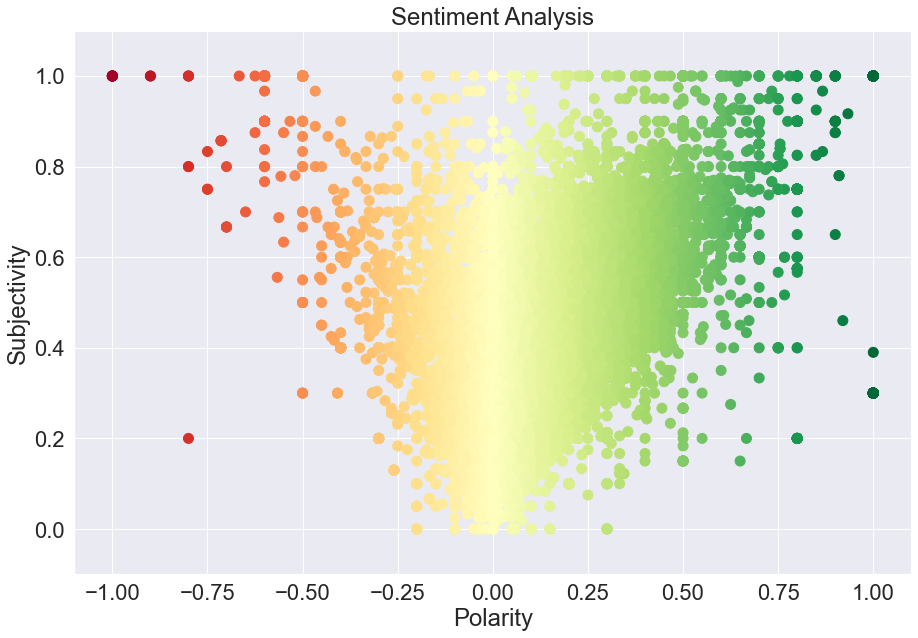

(None,)

In [43]:
plt.figure(figsize=(15,10)) 

# plt.style.use('seaborn-pastel')

plt.scatter(df['Polarity'], df['Subjectivity'], c=df['Polarity'], s=100, cmap='RdYlGn') 

plt.xlim(-1.1, 1.1)
plt.ylim(-0.1, 1.1) 
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show(),

In [44]:
# Show the value counts
df['Analysis_Polarity'].value_counts()

Positive    14563
Neutral      8884
Negative     4364
Name: Analysis_Polarity, dtype: int64

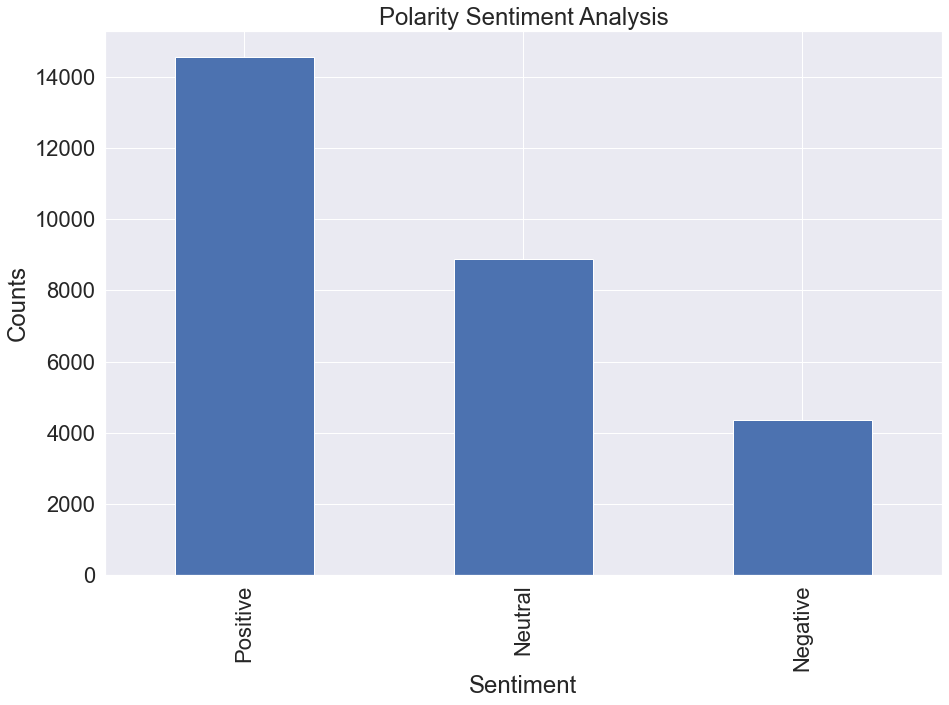

In [45]:
# Plotting and visualizing the counts
plt.figure(figsize=(15,10)) 

plt.title('Polarity Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis_Polarity'].value_counts().plot(kind = 'bar')
plt.show()

# Sentiment Analysis Pie Chart

<ipython-input-46-d761e0895079>:13: MatplotlibDeprecationWarning:

normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 



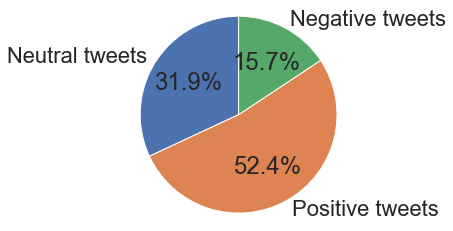

In [46]:
positive_polarity = [p for p in df['Polarity'] if p>0]
negative_polarity = [n for n in df['Polarity'] if n<0]
neutral_polarity = [r for r in df['Polarity'] if r==0]

total_size = len(positive_polarity) + len(negative_polarity) + len(neutral_polarity)
n_size = len(negative_polarity)/total_size
p_size = len(positive_polarity)/total_size
r_size = len(neutral_polarity)/total_size

labels = ['Neutral tweets', 'Positive tweets', 'Negative tweets']
sizes = [r_size, p_size, n_size]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
	        shadow=False, startangle=90)
ax1.axis('equal')
plt.show()

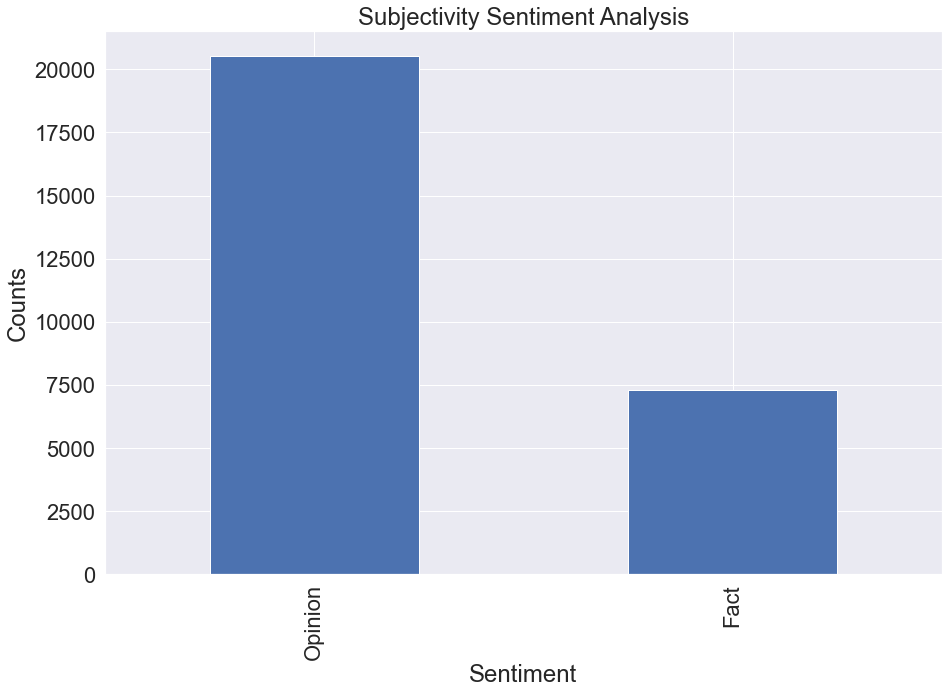

In [47]:
# Plotting and visualizing the counts
plt.figure(figsize=(15,10)) 

plt.title('Subjectivity Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis_Subjectivity'].value_counts().plot(kind = 'bar')
plt.show()

In [48]:
# Show the value counts
df['Analysis_Subjectivity'].value_counts()

Opinion    20508
Fact        7303
Name: Analysis_Subjectivity, dtype: int64

# TOPIC MODELING

In [49]:
import pyLDAvis
import pyLDAvis.gensim
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [50]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10)
dtm_tf = tf_vectorizer.fit_transform(df['cleaned_tweets'].values.astype('U'))
print(dtm_tf.shape)

C:\Users\andyo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



(27811, 4673)


In [51]:
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())
dtm_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_tweets'].values.astype('U'))
print(dtm_tfidf.shape)

C:\Users\andyo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

C:\Users\andyo\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1796: UserWarning:

Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.



(27811, 4673)


In [52]:
# for TF DTM
lda_tf = LatentDirichletAllocation(n_components =8, random_state=50)
lda_tf.fit(dtm_tf)
# for TFIDF DTM
lda_tfidf = LatentDirichletAllocation(n_components =8, random_state=50)
lda_tfidf.fit(dtm_tfidf)

C:\Users\andyo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



LatentDirichletAllocation(n_components=8, random_state=50)

In [53]:
#for i,topic in enumerate(lda_tf.components_):
#print([tfidf_vectorizer.get_feature_names()[i] for i in topic.argsort()[-10:]])
#print('\n')

C:\Users\andyo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [54]:
for i,topic in enumerate(lda_tf.components_):
    print(f'Top 10 words for topic #{i}:')
    print([tfidf_vectorizer.get_feature_names()[i] for i in topic.argsort()[-30:]])
    print('\n')

C:\Users\andyo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Top 10 words for topic #0:
['facilities', 'closure', 'movie', 'county', 'restrictions', 'operations', 'day', 'gyms', 'support', 'zoos', 'health', 'close', 'amp', 'indoor', 'reopen', 'theaters', 'city', 'restaurants', 'state', 'closed', 'public', 'new', 'kaohsiung', 'taiwan', 'took', 'place', 'museums', 'national', 'technology', 'science']


Top 10 words for topic #1:
['research', 'webinar', 'reopening', 'cultural', 'collections', 'planning', 'digital', 'staff', 'support', 'archives', 'innovation', 'online', 'sector', 'survey', 'times', 'libraries', 'tours', 'help', 'galleries', 'world', 'new', 'open', 'amp', 'pandemic', 'post', 'impact', 'virtual', 'art', 'crisis', 'museums']


Top 10 words for topic #2:
['coronavirus', 'virtual', 'date', 'morning', 'today', 'american', 'experiences', 'share', 'currently', 'help', 'document', 'changed', 'current', 'story', 'dan', 'online', 'historical', 'technologies', 'life', 'check', 'new', 'museums', 'time', 'stories', 'collecting', 'closed', 'amp',

In [55]:
pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer)

C:\Users\andyo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7     -0.104433  0.158924       1        1  16.754659
4     -0.112075  0.084529       2        1  16.331855
1     -0.059978 -0.079095       3        1  14.658884
5      0.186678 -0.023102       4        1  13.681498
6     -0.071381 -0.271249       5        1   9.823358
0      0.255777  0.019776       6        1   9.663175
3      0.045166  0.089888       7        1   9.604193
2     -0.139755  0.020328       8        1   9.482378, topic_info=             Term         Freq        Total Category  logprob  loglift
4153   technology  5919.000000  5919.000000  Default  30.0000  30.0000
2708      museums  9102.000000  9102.000000  Default  29.0000  29.0000
3670      science  2324.000000  2324.000000  Default  28.0000  28.0000
2725     national  1947.000000  1947.000000  Default  27.0000  27.0000
2946     pandemic  2636.000000  2636.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
2708      museums   271.058516  9102.512795   Topic8  -4.7178  -1.1582
1871         help   182.446169  1228.686692   Topic8  -5.1136   0.4485
4240        today   171.090133  1034.000302   Topic8  -5.1779   0.5567
887   coronavirus   147.803258   670.266537   Topic8  -5.3242   0.8439
4460      virtual   148.383083  1436.082715   Topic8  -5.3203   0.0859

[564 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
12        5  0.990216  academic
18        1  0.055719    access
18        2  0.612910    access
18        3  0.218590    access
18        5  0.004286    access
...     ...       ...       ...
4664      3  0.986839      zero
4668      4  0.897099       zoo
4668      6  0.096611       zoo
4670      3  0.005459      zoos
4670      6  0.988047      zoos

[1202 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 5, 2, 6, 7, 1, 4, 3])

In [56]:
topic_values = lda_tf.transform(dtm_tf)
topic_values.shape

C:\Users\andyo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



(27811, 8)

In [57]:
df.head()

C:\Users\andyo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Unnamed: 0,Unnamed: 0.1,place,tweet,near,geo,Date,Year,Month,cleaned_tweets,Subjectivity,Polarity,Analysis_Polarity,Analysis_Subjectivity
0,0,0,NaN,"Find your by downloading The Mob Museum free mobile app. Using cutting-edge facial recognition technology, the app compares your facial features with a database of notable heroes, villains, &amp; associates of the Mob world to find your match.",NaN,NaN,2020-03-31,2020,3,find your by downloading the mob museum free mobile app using cutting edge facial recognition technology the app compares your facial features with a database of notable heroes villains amp associates of the mob world to find your match,0.440000,0.060000,Positive,Opinion
1,1,1,NaN,"I think other museums and historical organizations can definitely incorporate new technologies and update their interpretations to be more relevant to the 21st century. I love the idea of the switch to the ""other"" telling THEIR story and being apart of the planning process. (1)",NaN,NaN,2020-03-31,2020,3,i think other museums and historical organizations can definitely incorporate new technologies and update their interpretations to be more relevant to the 21st century i love the idea of the switch to the other telling their story and being apart of the planning process 1,0.411616,0.142929,Positive,Opinion
2,2,2,NaN,"30% of NY’s Museums closed 2018 in deficit; too many factors here...lack of community engagement, poor planning, limited funding for gen op, shortsighted investment in staff and technology, imbalance of program to capital projects...cant point to one thing",NaN,NaN,2020-03-31,2020,3,30 of ny s museums closed 2018 in deficit too many factors here lack of community engagement poor planning limited funding for gen op shortsighted investment in staff and technology imbalance of program to capital projects cant point to one thing,0.335714,-0.017857,Negative,Opinion
3,3,3,NaN,"GLAD TO SEE YOU ,AND WE ARE THE SUPPLIER OF CHINA SCIENCE AND TECHNOLOGY MUSEUM ,Hefei Panshi Automation Technology Co.,Ltd ,thanks a lot.",NaN,NaN,2020-03-31,2020,3,glad to see you and we are the supplier of china science and technology museum hefei panshi automation technology co ltd thanks a lot,0.600000,0.350000,Positive,Opinion
4,4,4,NaN,"As theaters, museums and concert halls temporarily close their doors to the public, artists and galleries are using technology to reach new audiences",NaN,NaN,2020-03-31,2020,3,as theaters museums and concert halls temporarily close their doors to the public artists and galleries are using technology to reach new audiences,0.260606,0.068182,Positive,Opinion


In [58]:
# for TF DTM
#lda_tf = LatentDirichletAllocation(n_components =6, random_state=42)
#lda_tf.fit(dtm_tf)
# for TFIDF DTM
#lda_tfidf = LatentDirichletAllocation(n_components =6, random_state=42)
#lda_tfidf.fit(dtm_tfidf)

C:\Users\andyo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [59]:
df.columns

C:\Users\andyo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Index(['Unnamed: 0', 'Unnamed: 0.1', 'place', 'tweet', 'near', 'geo', 'Date',
       'Year', 'Month', 'cleaned_tweets', 'Subjectivity', 'Polarity',
       'Analysis_Polarity', 'Analysis_Subjectivity'],
      dtype='object')

In [60]:
df_1=df.replace({0:'Technology',1:'Museums',2:'Science',3:'National',4:'Pandemic',5:'Place',6:'Arts',7:'Took'})

C:\Users\andyo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [61]:
df_1['Topic'] = topic_values.argmax(axis=1)

C:\Users\andyo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [62]:
df['Topic'] = topic_values.argmax(axis=1)

C:\Users\andyo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [63]:
df_1.head()

C:\Users\andyo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Unnamed: 0,Unnamed: 0.1,place,tweet,near,geo,Date,Year,Month,cleaned_tweets,Subjectivity,Polarity,Analysis_Polarity,Analysis_Subjectivity,Topic
0,Technology,Technology,NaN,"Find your by downloading The Mob Museum free mobile app. Using cutting-edge facial recognition technology, the app compares your facial features with a database of notable heroes, villains, &amp; associates of the Mob world to find your match.",NaN,NaN,2020-03-31,2020,National,find your by downloading the mob museum free mobile app using cutting edge facial recognition technology the app compares your facial features with a database of notable heroes villains amp associates of the mob world to find your match,0.44,0.06,Positive,Opinion,7
1,Museums,Museums,NaN,"I think other museums and historical organizations can definitely incorporate new technologies and update their interpretations to be more relevant to the 21st century. I love the idea of the switch to the ""other"" telling THEIR story and being apart of the planning process. (1)",NaN,NaN,2020-03-31,2020,National,i think other museums and historical organizations can definitely incorporate new technologies and update their interpretations to be more relevant to the 21st century i love the idea of the switch to the other telling their story and being apart of the planning process 1,0.411616,0.142929,Positive,Opinion,7
2,Science,Science,NaN,"30% of NY’s Museums closed 2018 in deficit; too many factors here...lack of community engagement, poor planning, limited funding for gen op, shortsighted investment in staff and technology, imbalance of program to capital projects...cant point to one thing",NaN,NaN,2020-03-31,2020,National,30 of ny s museums closed 2018 in deficit too many factors here lack of community engagement poor planning limited funding for gen op shortsighted investment in staff and technology imbalance of program to capital projects cant point to one thing,0.335714,-0.0178571,Negative,Opinion,1
3,National,National,NaN,"GLAD TO SEE YOU ,AND WE ARE THE SUPPLIER OF CHINA SCIENCE AND TECHNOLOGY MUSEUM ,Hefei Panshi Automation Technology Co.,Ltd ,thanks a lot.",NaN,NaN,2020-03-31,2020,National,glad to see you and we are the supplier of china science and technology museum hefei panshi automation technology co ltd thanks a lot,0.6,0.35,Positive,Opinion,7
4,Pandemic,Pandemic,NaN,"As theaters, museums and concert halls temporarily close their doors to the public, artists and galleries are using technology to reach new audiences",NaN,NaN,2020-03-31,2020,National,as theaters museums and concert halls temporarily close their doors to the public artists and galleries are using technology to reach new audiences,0.260606,0.0681818,Positive,Opinion,5


In [64]:
df_1.columns

C:\Users\andyo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Index(['Unnamed: 0', 'Unnamed: 0.1', 'place', 'tweet', 'near', 'geo', 'Date',
       'Year', 'Month', 'cleaned_tweets', 'Subjectivity', 'Polarity',
       'Analysis_Polarity', 'Analysis_Subjectivity', 'Topic'],
      dtype='object')

C:\Users\andyo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



<Figure size 2880x1800 with 0 Axes>

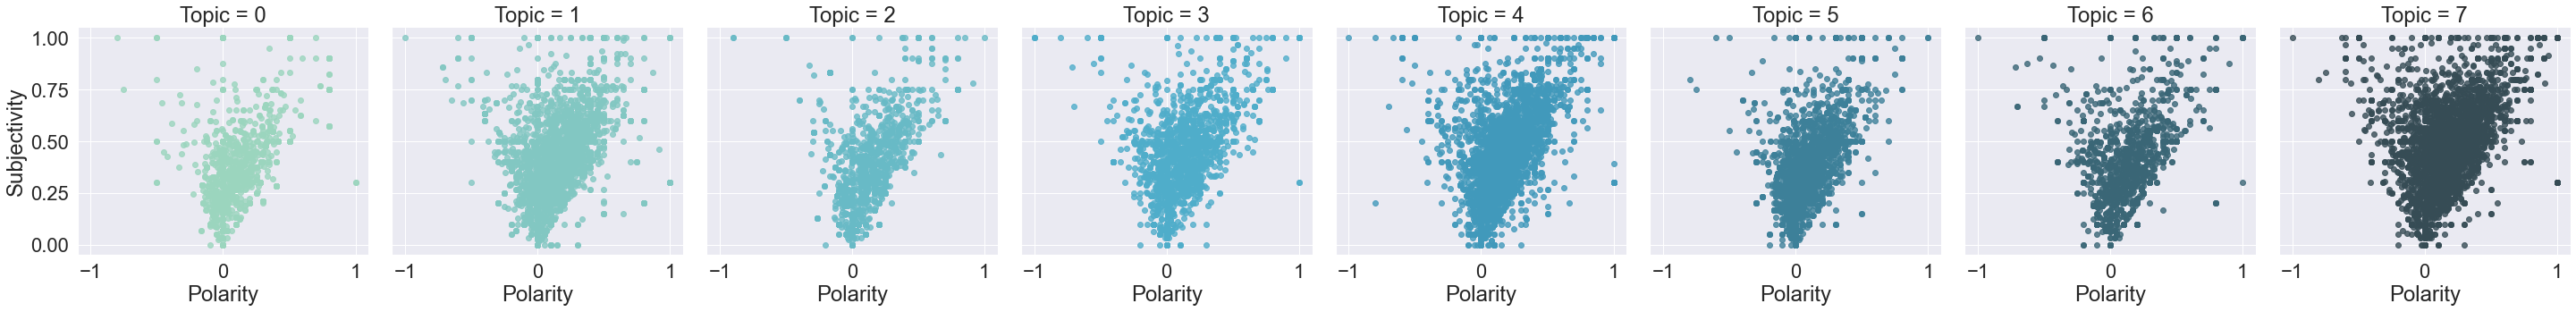

In [65]:
import seaborn as sns


plt.figure(figsize=(40,25)) 

g=sns.lmplot(x="Polarity", y="Subjectivity", hue='Topic', data=df, fit_reg=False, legend=False,palette="GnBu_d", col='Topic', legend_out=True)
 
# # Move the legend to an empty part of the plot
# plt.legend(loc='lower right')
 
plt.show()

In [66]:
df2 = df_1.groupby(['Topic'])['Analysis_Polarity'].value_counts().unstack('Topic').transpose()

df2

C:\Users\andyo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Analysis_Polarity,Negative,Neutral,Positive
Topic,,,
0,407,1281,813
1,611,1408,2306
2,294,1142,1101
3,452,667,1260
4,507,1283,2895
5,860,1184,1777
6,570,781,1174
7,663,1138,3237


In [67]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Negative  8 non-null      int64
 1   Neutral   8 non-null      int64
 2   Positive  8 non-null      int64
dtypes: int64(3)
memory usage: 256.0 bytes


C:\Users\andyo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [68]:
df2['Total'] = df2.sum(axis=1)

C:\Users\andyo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [69]:
df2.columns

C:\Users\andyo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Index(['Negative', 'Neutral', 'Positive', 'Total'], dtype='object', name='Analysis_Polarity')

In [70]:
for i in df2:
    df2[i] = round(df2[i]*100/df2.Total)

df2

C:\Users\andyo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Analysis_Polarity,Negative,Neutral,Positive,Total
Topic,,,,
0,16.0,51.0,33.0,100.0
1,14.0,33.0,53.0,100.0
2,12.0,45.0,43.0,100.0
3,19.0,28.0,53.0,100.0
4,11.0,27.0,62.0,100.0
5,23.0,31.0,47.0,100.0
6,23.0,31.0,46.0,100.0
7,13.0,23.0,64.0,100.0


In [71]:
df2=df2.fillna(0)

C:\Users\andyo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [72]:
#Conduct Polarity Topic Analysis using Tableau

df.to_excel("Polarity_Topic Modeling.xlsx")

C:\Users\andyo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [73]:
df2= df2.drop(['Total'], axis=1)

C:\Users\andyo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



C:\Users\andyo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



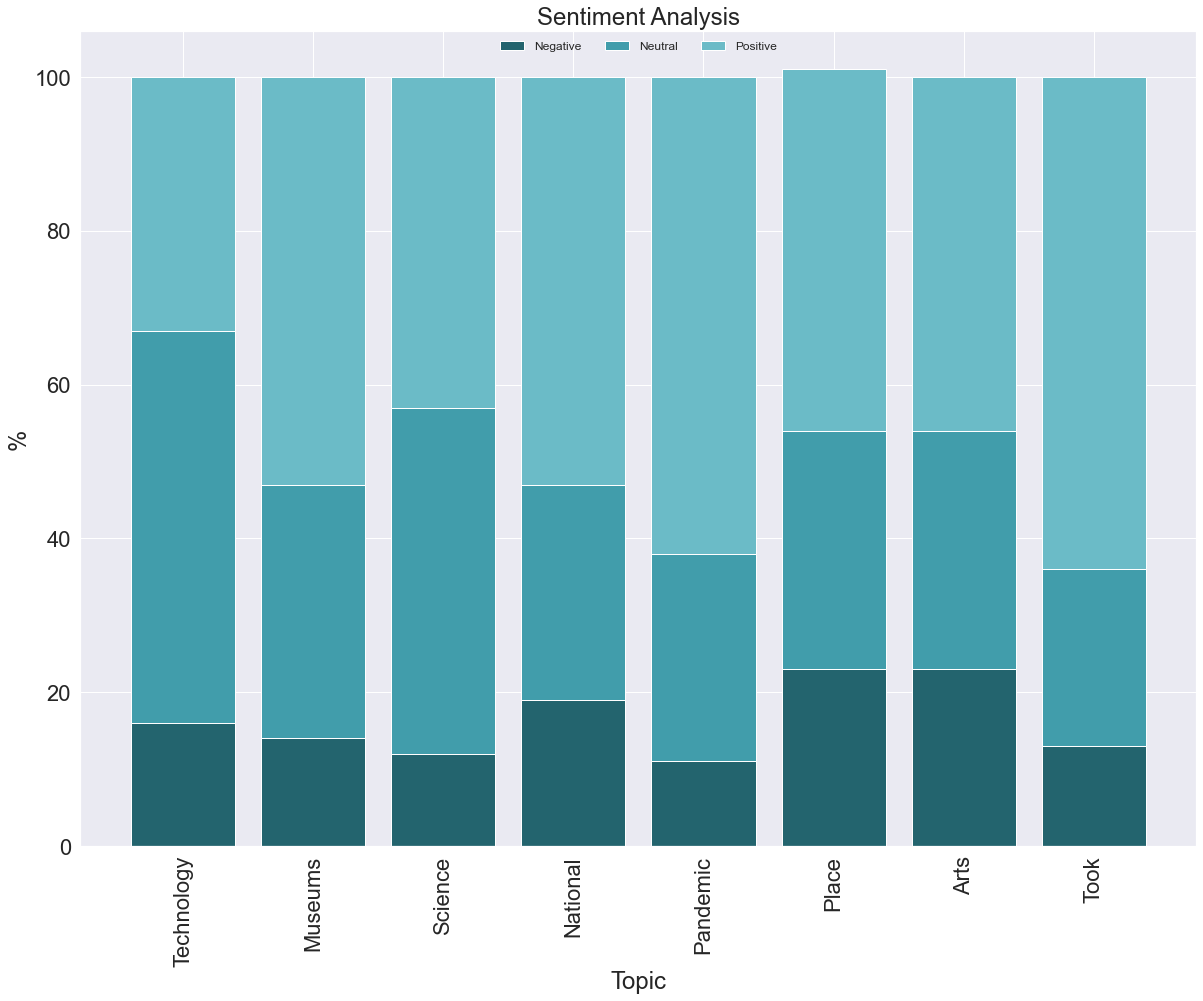

In [74]:
#Plotting and visualizing the counts
plt.figure(figsize=(20,15)) 


topic = ['Technology','Museums','Science','National','Pandemic','Place','Arts','Took']
sentiment = ['Negative', 'Neutral', 'Positive']
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('%')
p1=plt.bar(topic,df2['Negative'], color='#23646e')
p2=plt.bar(topic,df2['Neutral'], color='#419dab', bottom=df2['Negative'])
p3=plt.bar(topic,df2['Positive'], color='#6bbbc7', bottom=df2['Neutral']+df2['Negative'])
plt.xticks(topic, rotation=90)
plt.xlabel("Topic")
plt.legend((p1[0], p2[0], p3[0]),('Negative', 'Neutral', 'Positive'),fontsize=12, ncol=4, framealpha=0, fancybox=True, loc='upper center')

plt.show()


In [75]:
df2.columns

C:\Users\andyo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Index(['Negative', 'Neutral', 'Positive'], dtype='object', name='Analysis_Polarity')

In [76]:
df=df.replace({0:'Technology',1:'Museums',2:'Science',3:'National',4:'Pandemic',5:'Place',6:'Arts',7:'Took'})

C:\Users\andyo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [77]:
df.head()

C:\Users\andyo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Unnamed: 0,Unnamed: 0.1,place,tweet,near,geo,Date,Year,Month,cleaned_tweets,Subjectivity,Polarity,Analysis_Polarity,Analysis_Subjectivity,Topic
0,Technology,Technology,NaN,"Find your by downloading The Mob Museum free mobile app. Using cutting-edge facial recognition technology, the app compares your facial features with a database of notable heroes, villains, &amp; associates of the Mob world to find your match.",NaN,NaN,2020-03-31,2020,National,find your by downloading the mob museum free mobile app using cutting edge facial recognition technology the app compares your facial features with a database of notable heroes villains amp associates of the mob world to find your match,0.44,0.06,Positive,Opinion,Took
1,Museums,Museums,NaN,"I think other museums and historical organizations can definitely incorporate new technologies and update their interpretations to be more relevant to the 21st century. I love the idea of the switch to the ""other"" telling THEIR story and being apart of the planning process. (1)",NaN,NaN,2020-03-31,2020,National,i think other museums and historical organizations can definitely incorporate new technologies and update their interpretations to be more relevant to the 21st century i love the idea of the switch to the other telling their story and being apart of the planning process 1,0.411616,0.142929,Positive,Opinion,Took
2,Science,Science,NaN,"30% of NY’s Museums closed 2018 in deficit; too many factors here...lack of community engagement, poor planning, limited funding for gen op, shortsighted investment in staff and technology, imbalance of program to capital projects...cant point to one thing",NaN,NaN,2020-03-31,2020,National,30 of ny s museums closed 2018 in deficit too many factors here lack of community engagement poor planning limited funding for gen op shortsighted investment in staff and technology imbalance of program to capital projects cant point to one thing,0.335714,-0.0178571,Negative,Opinion,Museums
3,National,National,NaN,"GLAD TO SEE YOU ,AND WE ARE THE SUPPLIER OF CHINA SCIENCE AND TECHNOLOGY MUSEUM ,Hefei Panshi Automation Technology Co.,Ltd ,thanks a lot.",NaN,NaN,2020-03-31,2020,National,glad to see you and we are the supplier of china science and technology museum hefei panshi automation technology co ltd thanks a lot,0.6,0.35,Positive,Opinion,Took
4,Pandemic,Pandemic,NaN,"As theaters, museums and concert halls temporarily close their doors to the public, artists and galleries are using technology to reach new audiences",NaN,NaN,2020-03-31,2020,National,as theaters museums and concert halls temporarily close their doors to the public artists and galleries are using technology to reach new audiences,0.260606,0.0681818,Positive,Opinion,Place


# Topic Counts

In [78]:
# Show the value counts
df['Topic'].value_counts()

C:\Users\andyo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Took          5038
Pandemic      4685
Museums       4325
Place         3821
Science       2537
Arts          2525
Technology    2501
National      2379
Name: Topic, dtype: int64

C:\Users\andyo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



<AxesSubplot:xlabel='Topic', ylabel='count'>

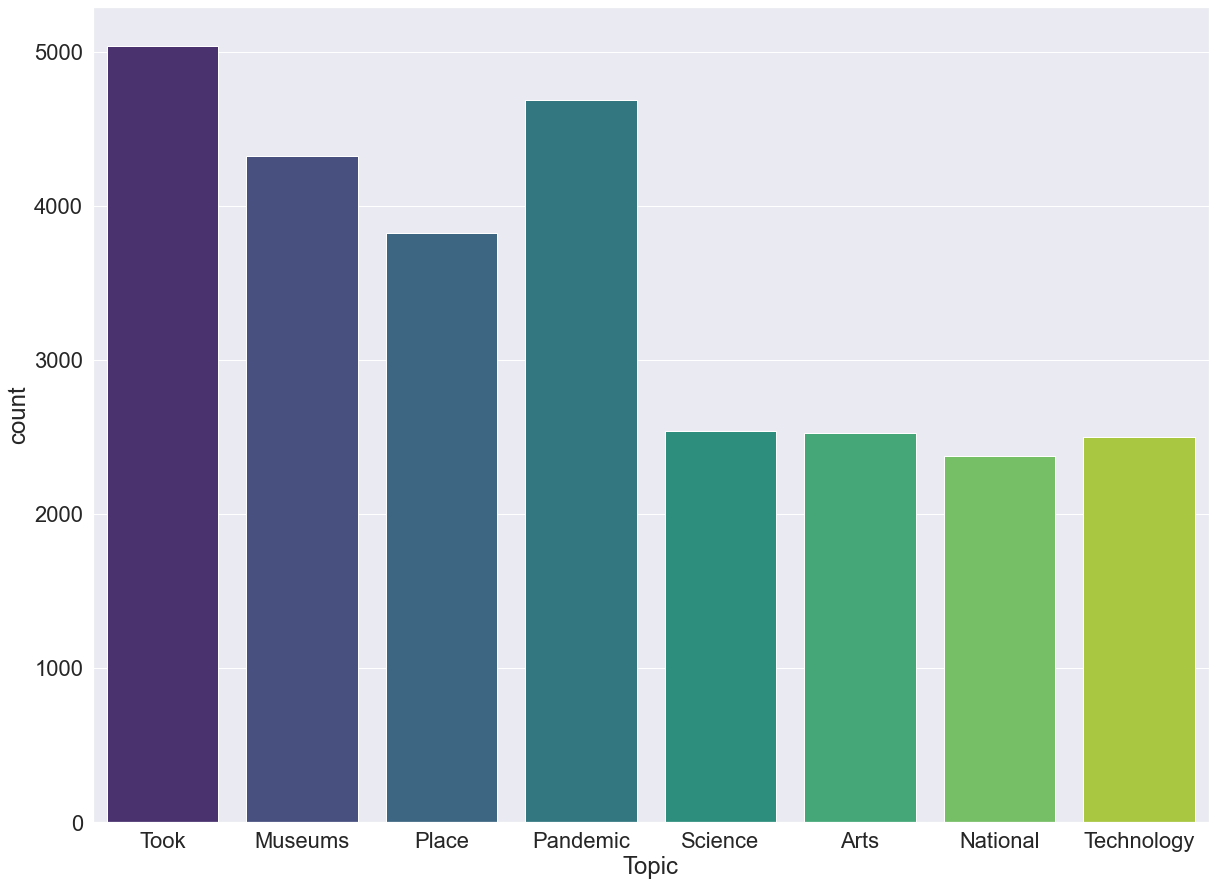

In [79]:
plt.figure(figsize=(20,15)) 
sns.countplot(x = 'Topic',data = df, palette = 'viridis')


# TREND ANALYSIS

In [80]:
# Create date range with frequency of a day
rng = pd.date_range(start='04/01/2020', end ='11/01/2020',freq='D')



C:\Users\andyo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [81]:

df3 = df.groupby(['Date','Topic'])['cleaned_tweets'].count().reset_index()

C:\Users\andyo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [82]:
df3

C:\Users\andyo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Date,Topic,cleaned_tweets
0,2020-03-31,Arts,6
1,2020-03-31,Museums,3
2,2020-03-31,National,1
3,2020-03-31,Place,1
4,2020-03-31,Science,5
...,...,...,...
1928,2020-11-28,Pandemic,14
1929,2020-11-28,Place,7
1930,2020-11-28,Science,3
1931,2020-11-28,Technology,5


In [83]:
pivoted = df3.pivot( index='Date',columns='Topic', values='cleaned_tweets').reset_index()

C:\Users\andyo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [84]:
pivoted

C:\Users\andyo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Topic,Date,Arts,Museums,National,Pandemic,Place,Science,Technology,Took
0,2020-03-31,6.0,3.0,1.0,NaN,1.0,5.0,NaN,5.0
1,2020-04-01,25.0,54.0,17.0,21.0,17.0,19.0,10.0,23.0
2,2020-04-02,31.0,24.0,24.0,25.0,7.0,21.0,13.0,19.0
3,2020-04-03,21.0,37.0,8.0,45.0,18.0,11.0,9.0,27.0
4,2020-04-04,9.0,17.0,11.0,17.0,10.0,8.0,4.0,18.0
...,...,...,...,...,...,...,...,...,...
238,2020-11-24,15.0,22.0,17.0,34.0,29.0,10.0,8.0,33.0
239,2020-11-25,8.0,12.0,13.0,18.0,13.0,6.0,8.0,19.0
240,2020-11-26,5.0,10.0,8.0,21.0,10.0,9.0,19.0,21.0
241,2020-11-27,6.0,14.0,13.0,20.0,18.0,6.0,5.0,13.0


In [85]:
pivoted=pivoted.fillna(0)

C:\Users\andyo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [86]:
pivoted.to_csv("tweets_by_date.csv")

C:\Users\andyo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



C:\Users\andyo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



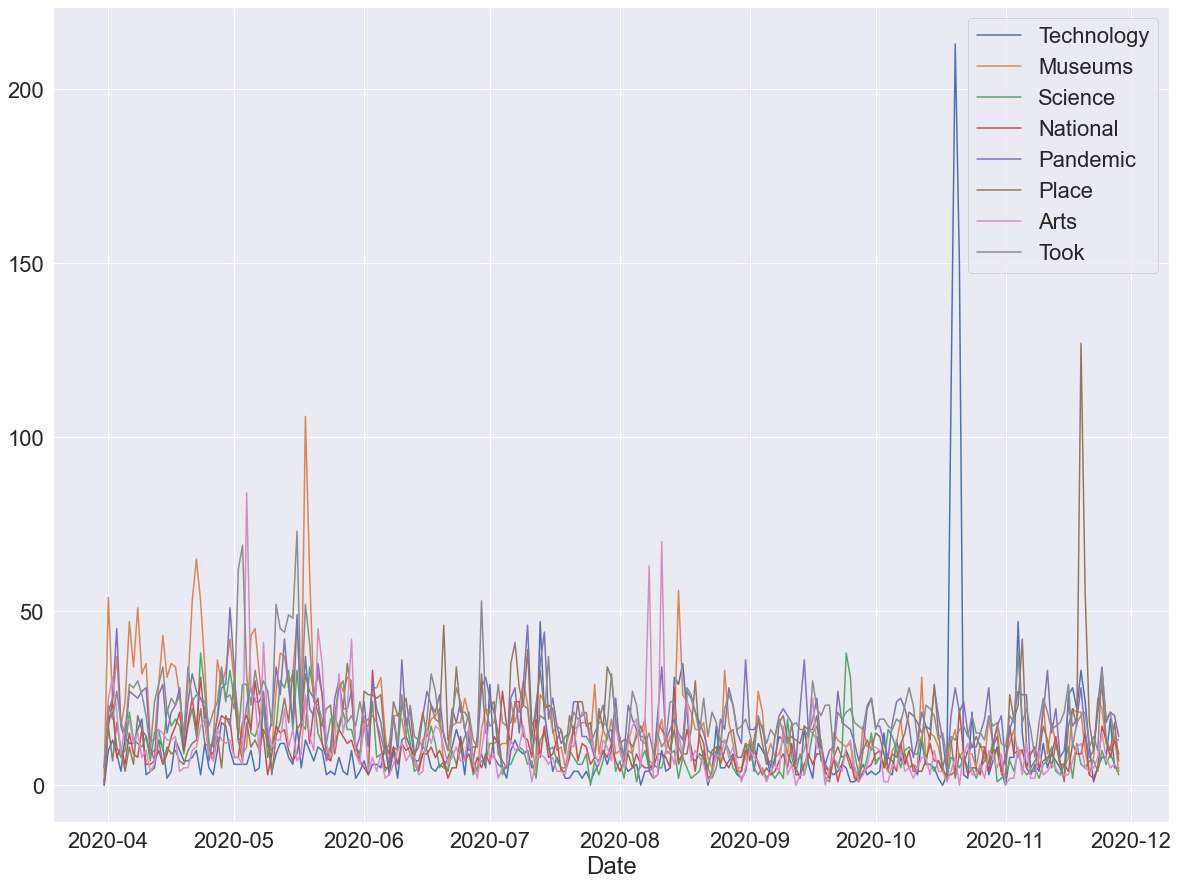

In [87]:
import matplotlib.dates as mdates

plt.figure(figsize=(20,15)) 

# gca stands for 'get current axis'
ax = plt.gca()

pivoted.plot(kind='line', x='Date', y='Technology', label='Technology',ax=ax)
pivoted.plot(kind='line', x='Date', y='Museums', label='Museums',ax=ax)
pivoted.plot(kind='line', x='Date', y='Science', label='Science',ax=ax)
pivoted.plot(kind='line', x='Date', y='National', label='National',ax=ax)
pivoted.plot(kind='line', x='Date', y='Pandemic', label='Pandemic',ax=ax)
pivoted.plot(kind='line', x='Date', y='Place', label='Place',ax=ax)
pivoted.plot(kind='line', x='Date', y='Arts', label='Arts',ax=ax)
pivoted.plot(kind='line', x='Date', y='Took', label='Took',ax=ax)


# ax.xaxis_date()
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

plt.legend()
plt.show()



# CLUSTER ANALYSIS WITH HEATMAP

In [88]:
# # Preparing a corpus for analysis and checking first 10 entries

corpus=[]
a=[]
for i in range(len(df['cleaned_tweets'])):
    a=df['cleaned_tweets'][i]
    corpus.append(a)
        
print(corpus[0:10])

['find your by downloading the mob museum free mobile app using cutting edge facial recognition technology the app compares your facial features with a database of notable heroes villains amp associates of the mob world to find your match', 'i think other museums and historical organizations can definitely incorporate new technologies and update their interpretations to be more relevant to the 21st century i love the idea of the switch to the other telling their story and being apart of the planning process 1', '30 of ny s museums closed 2018 in deficit too many factors here lack of community engagement poor planning limited funding for gen op shortsighted investment in staff and technology imbalance of program to capital projects cant point to one thing', 'glad to see you and we are the supplier of china science and technology museum hefei panshi automation technology co ltd thanks a lot', 'as theaters museums and concert halls temporarily close their doors to the public artists and g

C:\Users\andyo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [89]:
import os
import gensim
from gensim import corpora, models, similarities
import logging
import tempfile
from nltk.corpus import stopwords
from string import punctuation
from collections import OrderedDict
import seaborn as sns
import pyLDAvis.gensim
import matplotlib.pyplot as plt
%matplotlib inline

# init_notebook_mode(connected=True) #do not miss this line

C:\Users\andyo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

C:\Users\andyo\Anaconda3\lib\site-packages\scipy\sparse\sparsetools.py:21: DeprecationWarning:

`scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.



In [90]:
# removing common words and tokenizing
list1 = ['RT','rt']
stoplist = stopwords.words('english') + list(punctuation) + list1

texts = [[word for word in str(document).lower().split() if word not in stoplist] for document in corpus]

dictionary = corpora.Dictionary(texts)

# print(dictionary)
# print(dictionary.token2id)

C:\Users\andyo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [91]:
corpus = [dictionary.doc2bow(text) for text in texts]

C:\Users\andyo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [92]:
tfidf = models.TfidfModel(corpus) # step 1 -- initialize a model

C:\Users\andyo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [93]:
corpus_tfidf = tfidf[corpus]  # step 2 -- use the model to transform vectors

C:\Users\andyo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [94]:
total_topics = 2

lda = models.LdaModel(corpus, id2word=dictionary, num_topics=total_topics)
corpus_lda = lda[corpus_tfidf] # create a double wrapper over the original corpus: bow->tfidf->fold-in-lsi

#Show first n important word in the topics:
lda.show_topics(total_topics,10)

C:\Users\andyo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



[(0,
  '0.042*"museum" + 0.027*"covid" + 0.026*"19" + 0.008*"art" + 0.006*"amid" + 0.006*"de" + 0.004*"di" + 0.004*"museums" + 0.004*"new" + 0.003*"via"'),
 (1,
  '0.056*"19" + 0.054*"covid" + 0.034*"museum" + 0.024*"museums" + 0.009*"due" + 0.008*"pandemic" + 0.008*"amp" + 0.006*"new" + 0.006*"closed" + 0.005*"art"')]

In [95]:

total_topics = 3

lda = models.LdaModel(corpus, id2word=dictionary, num_topics=total_topics)
corpus_lda = lda[corpus_tfidf] # create a double wrapper over the original corpus: bow->tfidf->fold-in-lsi

#Show first n important word in the topics:
lda.show_topics(total_topics,10)

C:\Users\andyo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



[(0,
  '0.040*"museum" + 0.033*"19" + 0.032*"covid" + 0.009*"de" + 0.006*"di" + 0.005*"virtual" + 0.005*"masks" + 0.005*"survey" + 0.004*"art" + 0.004*"en"'),
 (1,
  '0.064*"19" + 0.064*"covid" + 0.030*"museum" + 0.029*"museums" + 0.010*"due" + 0.010*"pandemic" + 0.009*"amp" + 0.008*"new" + 0.007*"closed" + 0.007*"art"'),
 (2,
  '0.052*"museum" + 0.015*"covid" + 0.014*"19" + 0.013*"national" + 0.006*"safety" + 0.006*"closure" + 0.005*"city" + 0.004*"announced" + 0.004*"year" + 0.004*"history"')]

In [96]:
data_lda = {i: OrderedDict(lda.show_topic(i,10)) for i in range(total_topics)}
data_lda

C:\Users\andyo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



{0: OrderedDict([('museum', 0.040465146),
              ('19', 0.03279702),
              ('covid', 0.031770363),
              ('de', 0.008791611),
              ('di', 0.0060433736),
              ('virtual', 0.0048154374),
              ('masks', 0.0047951005),
              ('survey', 0.004694906),
              ('art', 0.004025411),
              ('en', 0.0040007853)]),
 1: OrderedDict([('19', 0.064488284),
              ('covid', 0.06370481),
              ('museum', 0.02954053),
              ('museums', 0.02902788),
              ('due', 0.010398381),
              ('pandemic', 0.010161675),
              ('amp', 0.008878935),
              ('new', 0.0075870175),
              ('closed', 0.0073413327),
              ('art', 0.0067869304)]),
 2: OrderedDict([('museum', 0.051743507),
              ('covid', 0.014507523),
              ('19', 0.01440756),
              ('national', 0.0127958),
              ('safety', 0.0061874166),
              ('closure', 0.005543731),
        

In [97]:

df_lda = pd.DataFrame(data_lda)
df_lda = df_lda.fillna(0).T
print(df_lda.shape)

(3, 23)


C:\Users\andyo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [98]:
df_lda

C:\Users\andyo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,museum,19,covid,de,di,virtual,masks,survey,art,en,...,amp,new,closed,national,safety,closure,city,announced,year,history
0,0.040465,0.032797,0.031770,0.008792,0.006043,0.004815,0.004795,0.004695,0.004025,0.004001,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
1,0.029541,0.064488,0.063705,0.000000,0.000000,0.000000,0.000000,0.000000,0.006787,0.000000,...,0.008879,0.007587,0.007341,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
2,0.051744,0.014408,0.014508,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.012796,0.006187,0.005544,0.004624,0.004445,0.00442,0.00432


In [99]:
try_lda=df_lda.T

C:\Users\andyo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [100]:
try_lda

C:\Users\andyo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,0,1,2
museum,0.040465,0.029541,0.051744
19,0.032797,0.064488,0.014408
covid,0.031770,0.063705,0.014508
de,0.008792,0.000000,0.000000
di,0.006043,0.000000,0.000000
virtual,0.004815,0.000000,0.000000
masks,0.004795,0.000000,0.000000
survey,0.004695,0.000000,0.000000
art,0.004025,0.006787,0.000000
en,0.004001,0.000000,0.000000


C:\Users\andyo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



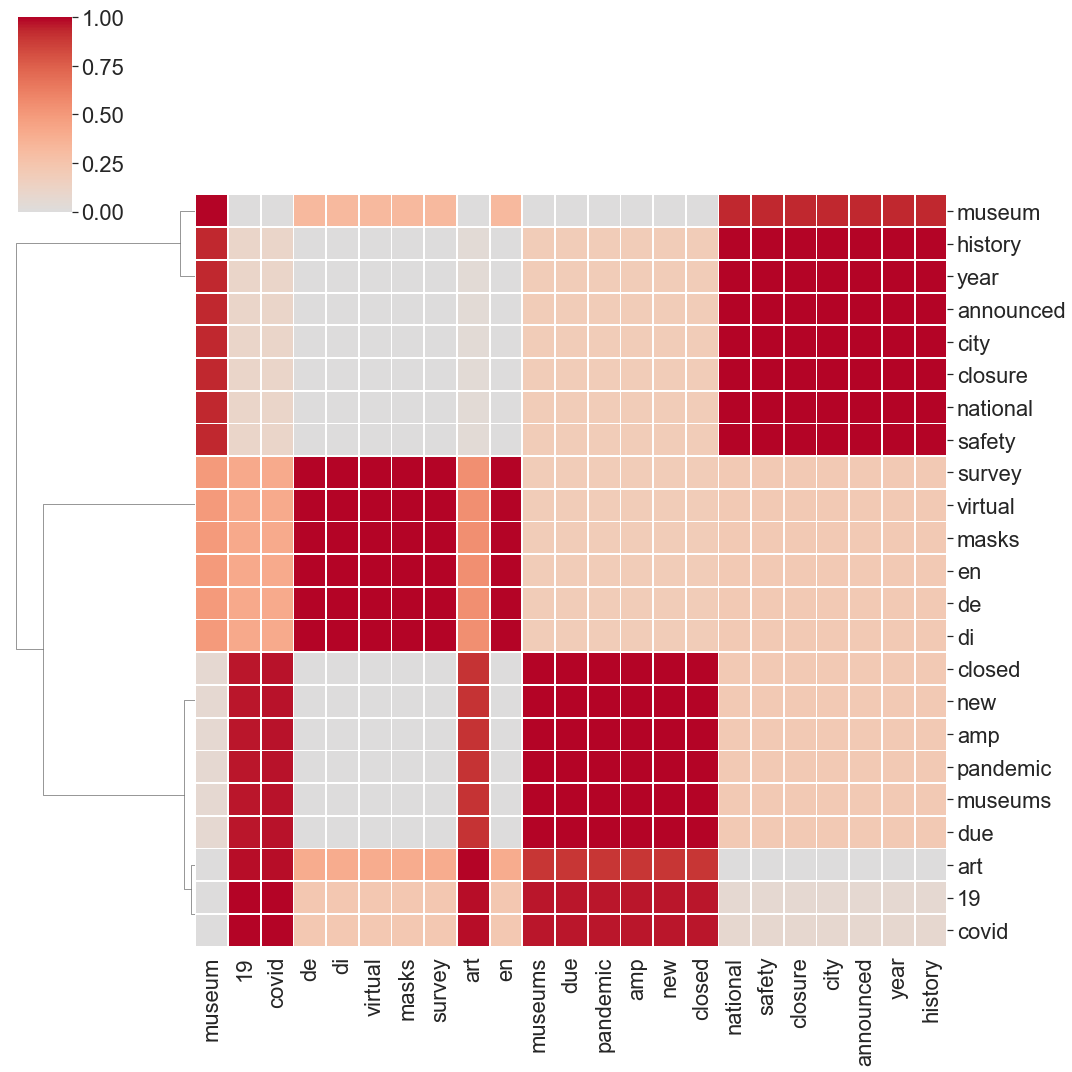

In [101]:
g=sns.clustermap(df_lda.corr(), center=0, standard_scale=1, cmap="coolwarm", metric='cosine', linewidths=.75, figsize=(15, 15), col_cluster=False)
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)

plt.show()
#plt.setp(ax_heatmap.get_yticklabels(), rotation=0)  # For y axis

In [102]:

# pyLDAvis.enable_notebook()
# panel = pyLDAvis.gensim.prepare(lda, corpus_lda, dictionary, mds='tsne')
# panel

C:\Users\andyo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



# CORRELATION 

In [103]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
plt.rcParams["patch.force_edgecolor"] = True
%matplotlib inline

C:\Users\andyo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [104]:
dataset = pd.read_csv('tweets_by_date.csv')


# Statistical Summary

In [105]:
# Statistical summary
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,243.0,121.000000,70.292247,0.0,60.5,121.0,181.5,242.0
Arts,243.0,10.390947,10.024734,0.0,5.0,8.0,12.0,84.0
Museums,243.0,17.798354,13.060748,1.0,9.0,15.0,23.0,106.0
National,243.0,9.790123,5.898696,1.0,5.5,9.0,12.0,33.0
Pandemic,243.0,19.279835,8.674312,0.0,13.0,19.0,25.0,51.0
Place,243.0,15.724280,11.095477,1.0,9.0,14.0,20.0,127.0
Science,243.0,10.440329,7.462824,0.0,5.0,9.0,14.0,38.0
Technology,243.0,10.292181,18.600215,0.0,4.0,6.0,11.0,213.0
Took,243.0,20.732510,9.508068,5.0,15.0,19.0,23.5,73.0


In [106]:
# Identify continuous variables
print(dataset.select_dtypes(['float']).columns)

Index(['Arts', 'Museums', 'National', 'Pandemic', 'Place', 'Science',
       'Technology', 'Took'],
      dtype='object')


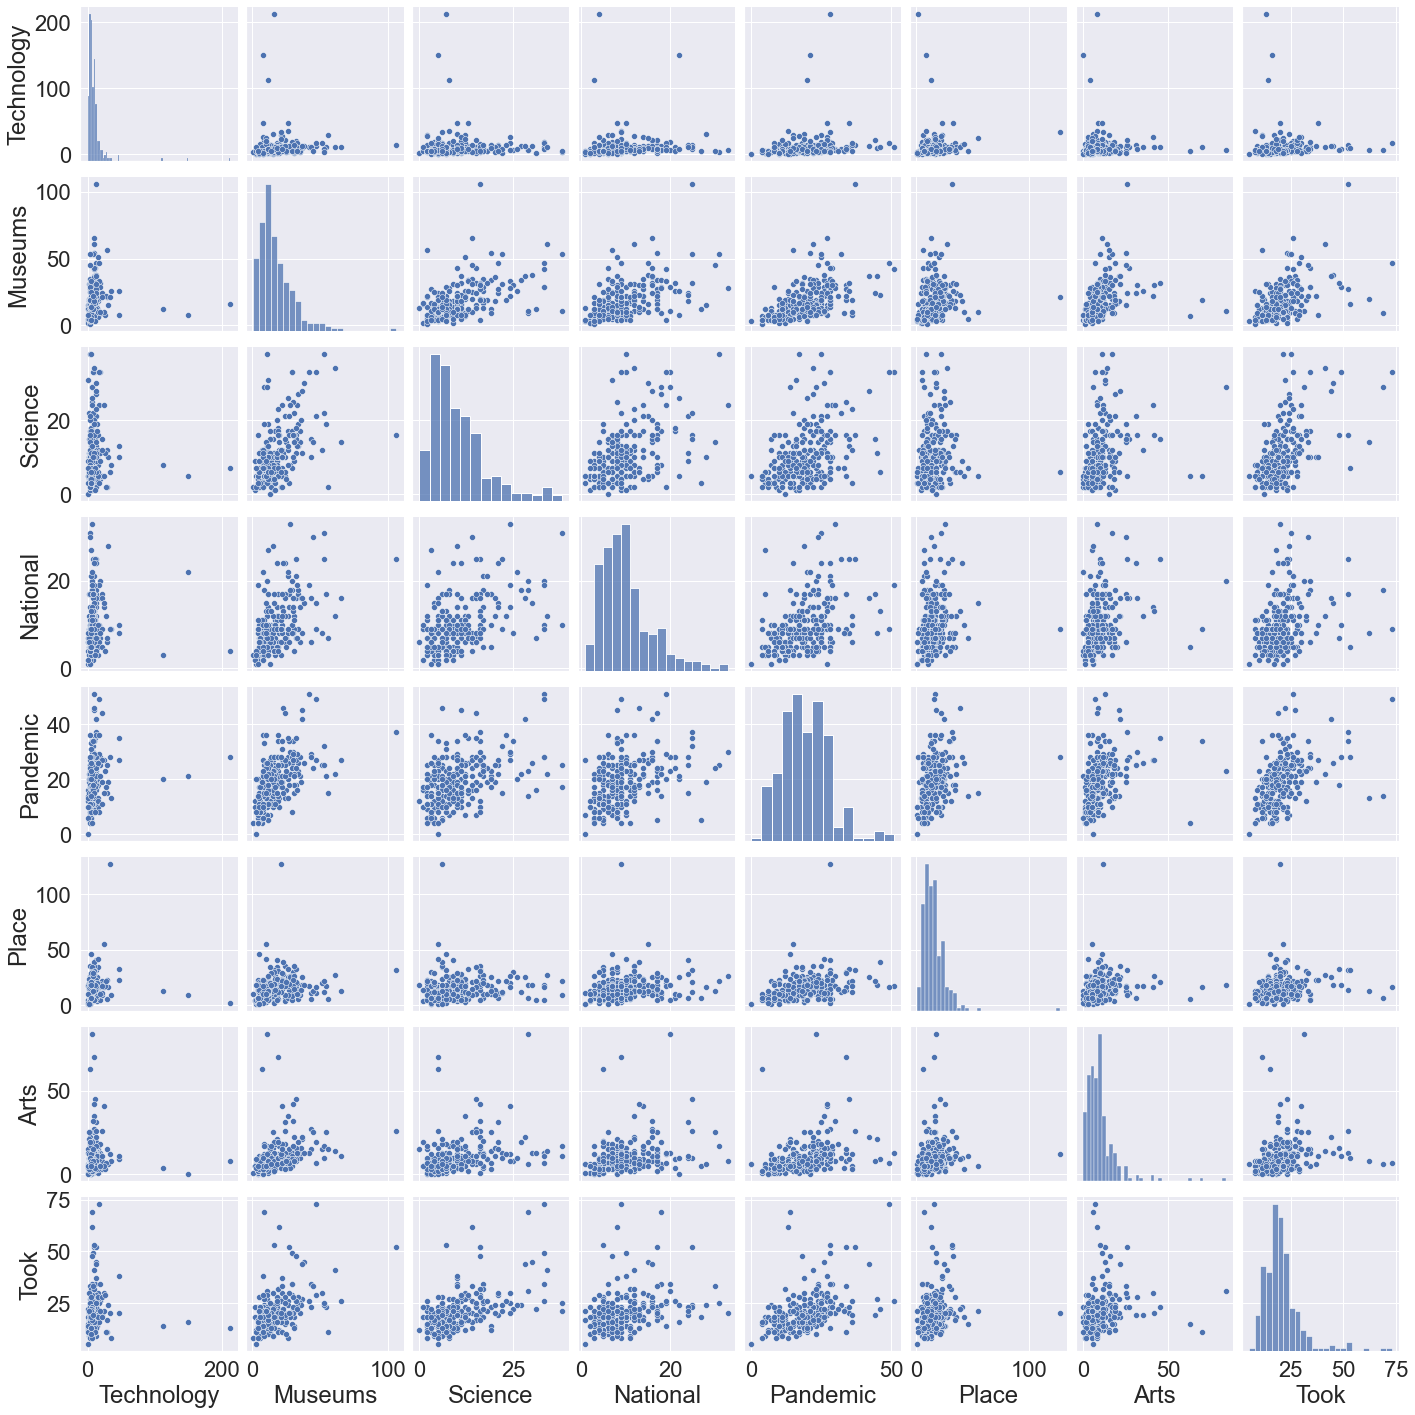

In [107]:

##Next, I want to compare the relationship (Correlation) between the identified topics in the dataset.

sns.pairplot(dataset[['Technology','Museums','Science','National','Pandemic','Place','Arts','Took']])

plt.show()

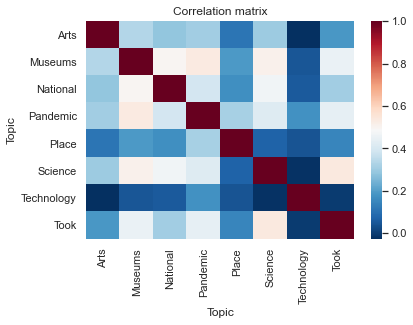

In [108]:
#This is another visual representation of Correlation Matrix to use
## SELECT COLORS https://python-graph-gallery.com/92-control-color-in-seaborn-heatmaps/


corrMatrix = pivoted.corr()

sns.set(font_scale=1)
sns.heatmap(corrMatrix, annot=False,
            xticklabels=corrMatrix.columns,
            yticklabels=corrMatrix.columns,
            cmap='RdBu_r'
            )
plt.title('Correlation matrix')
plt.show()

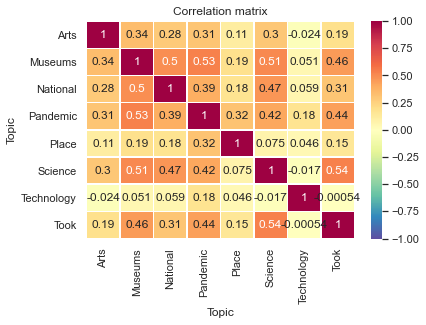

In [109]:
#This is another visual representation of Correlation Matrix to use
sns.set(font_scale=1)
sns.heatmap(corrMatrix, annot=True, linewidth = 0.5, cmap='Spectral_r',square=False, vmin = -1, vmax = 1)
plt.title('Correlation matrix')

plt.show()

# CLUSTER ANALYSIS HEATMAP

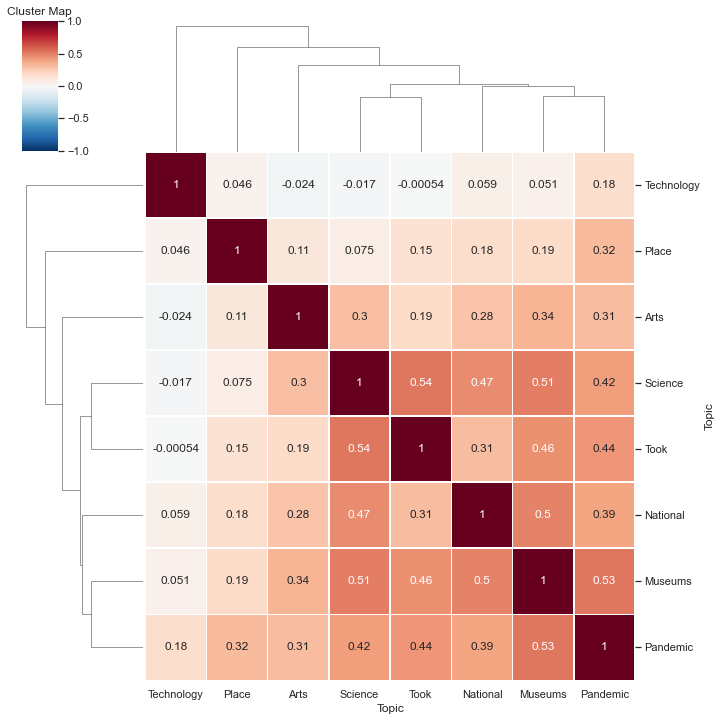

In [110]:
# Create cluter map
sns.clustermap(corrMatrix, annot=True, linewidth = 0.5, cmap='RdBu_r',square=False, vmin = -1, vmax = 1)
plt.title('Cluster Map')

plt.show()